In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.shape

(768, 9)

In [5]:

x=diabetes.iloc[:,0:8]

y = diabetes.Outcome


In [6]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [7]:
x.shape


(768, 8)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)  ## Se estiman los parámetros media y desviación estándar

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)

In [11]:
logreg.predict_proba(X_test_std)

array([[0.04281504, 0.95718496],
       [0.83341554, 0.16658446],
       [0.91124398, 0.08875602],
       [0.36367363, 0.63632637],
       [0.8814876 , 0.1185124 ],
       [0.96168303, 0.03831697],
       [0.25541564, 0.74458436],
       [0.14228944, 0.85771056],
       [0.59939297, 0.40060703],
       [0.6139451 , 0.3860549 ],
       [0.41532038, 0.58467962],
       [0.03945154, 0.96054846],
       [0.71226668, 0.28773332],
       [0.81860399, 0.18139601],
       [0.87399449, 0.12600551],
       [0.83956411, 0.16043589],
       [0.14202786, 0.85797214],
       [0.97494963, 0.02505037],
       [0.56028781, 0.43971219],
       [0.75421241, 0.24578759],
       [0.34231937, 0.65768063],
       [0.59325718, 0.40674282],
       [0.80922513, 0.19077487],
       [0.93040314, 0.06959686],
       [0.94826086, 0.05173914],
       [0.65454096, 0.34545904],
       [0.9546262 , 0.0453738 ],
       [0.08976828, 0.91023172],
       [0.89254143, 0.10745857],
       [0.86622505, 0.13377495],
       [0.

In [12]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

Evaluación

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8020833333333334

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X_train_std, y_train, cv=3, scoring="accuracy")

array([0.765625  , 0.75520833, 0.75520833])

Matriz de confusión

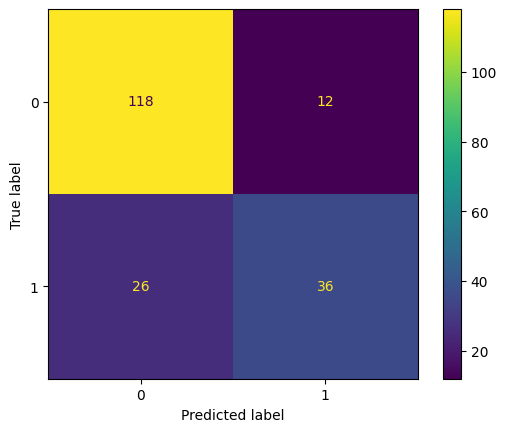

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

Cada fila representa los datos "reales" y cada columna los datos "predichos" por el modelo

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)



np.float64(0.75)

In [17]:
recall_score(y_test, y_pred)

np.float64(0.5806451612903226)

In [18]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

np.float64(0.6545454545454545)

In [19]:
import joblib
joblib.dump(logreg,"modelo_entrenado.pkl") #Guardamos el modelo

['modelo_entrenado.pkl']

In [20]:
joblib.dump(sc, 'scaler.pkl') #Guardamos el "escalalizador"

['scaler.pkl']